--------------------------
<FONT SIZE=6 COLOR=ROYALBLUE >DEEP LEARNING PROJECT

<font color=maroon>(TechNest Task 2 : Fake and Real news dataset)

---------------------
Fake News Detection Using Deep Learning (NLP)


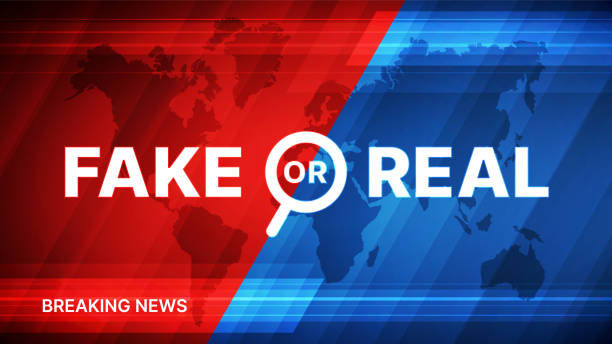

<font color=lightseagreen>To get the dataset : [Here you go !](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data)

## <font color=purple>Introduction

<font color=navyblue>Objective:

 Design and train a deep learning model to classify news articles as "fake" or "true" based on their title and text content. This is an NLP task using binary classification.

## <font color=purple>Datasets:

- Fake News Dataset: 23,481 entries with columns: title, text, subject, date.
- True News Dataset: 21,417 entries with columns: title, text, subject, date.
- We will combine them, add a binary label (0 for true, 1 for fake), and use title + text as input features.

<font color=navyblue>Framework:

 PyTorch for model building and training.

<font color=navyblue>Model:

  A simple LSTM (Long Short-Term Memory) network for sequence classification. Evaluation: Accuracy, loss curves, confusion matrix, and classification report.
  
<font color=navyblue>Insights:

Interpret model predictions using attention-like mechanisms (via gradients) and discuss performance.

## <font color=purple>Assumptions:
- Datasets are pre-cleaned (no nulls, as per descriptions).
- We use a subset for faster training (e.g., 10,000 samples total).
- Preprocessing includes tokenization, padding, and embedding.

> <font size=5 color=royalblue>IMPORT LIBRARIES

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


> <font size=5 color=royalblue>IMPORT DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import both Dataset
df_fake = pd.read_csv('/content/drive/MyDrive/archive/Fake.csv')
df_true = pd.read_csv('/content/drive/MyDrive/archive/True.csv')

In [4]:
# Display basic info
print("Fake News Dataset Info:")
print(df_fake.info())
print("\nTrue News Dataset Info:")
print(df_true.info())

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [5]:
# Add labels: 0 for fake, 1 for true
df_fake['label'] = 0
df_true['label'] = 1

In [6]:
print('First 5 rows of Fake Dataset: \n')
df_fake.head()

First 5 rows of Fake Dataset: 



,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
print('First 5 rows of True Dataset: \n')
df_true.head()

First 5 rows of True Dataset: 



,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


> <font size=5 color=royalblue>COMBINE BOTH DATASET

In [8]:
# Combine datasets
df = pd.concat([df_fake, df_true], ignore_index=True)
# Basic exploration
print("Combined Dataset Shape:", df.shape)
print("Label Distribution:")
print(df['label'].value_counts())
print('First 5 rows of Combined Dataset: \n')
df.head()

Combined Dataset Shape: (44898, 5)
Label Distribution:
label
0    23481
1    21417
Name: count, dtype: int64
First 5 rows of Combined Dataset: 



,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


> <font size=5 color=royalblue>EXPLORATORY DATA ANALYSIS

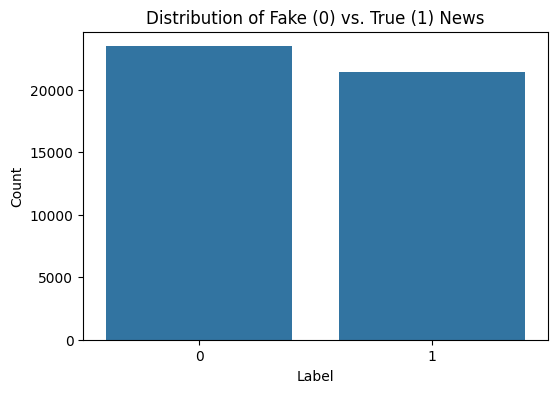

In [9]:
# Visualize label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake (0) vs. True (1) News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

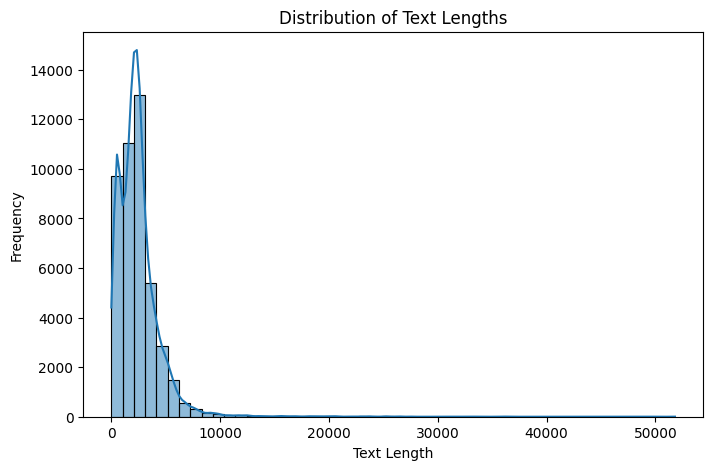

In [10]:
# Visualize text length distribution
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Sample data
print("Sample Fake News:")
print(df[df['label'] == 0]['text'].head(1).values)
print("\nSample True News:")
print(df[df['label'] == 1]['text'].head(1).values)

Sample Fake News:
['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack 

> <font size=5 color=royalblue> DATA PREPROCESSING

Prepare the text data for the model: tokenize, pad sequences, and split into train/test sets.

- Tokenization: Converts text to sequences of integers.
- Padding: Ensures all sequences are the same length for batch processing.
- Split: Stratified to maintain label balance.
- Beginner tip: Think of this as "translating" words into numbers the model can understand.

In [12]:
# Preprocessing parameters
max_vocab_size = 10000  # Maximum number of words in vocabulary
max_seq_length = 500    # Maximum sequence length (based on text length distribution)
embedding_dim = 100     # Embedding dimension

# Tokenize text
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post', truncating='post')

# Labels
labels = df['label'].values

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42, stratify=labels)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (35918, 500)
Test Data Shape: (8980, 500)


> <font size=5 color=royalblue>BUILD DEEP LEARNING MODEL

We'll use a simple LSTM model for text classification. LSTMs are good for sequential data like text.

- Embedding Layer: Converts word indices to dense vectors.
- LSTM Layer: Captures context in text sequences.
- Dense Layers: For classification.
- Sigmoid: Outputs probability (0-1) for binary labels.
- This architecture is simple yet effective for beginners.

In [13]:
# Build the model without input_length
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Build the model explicitly with input shape
model.build(input_shape=(None, max_seq_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125,569 (4.29 MB)

 Trainable params: 1,125,569 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

> <font size=5 color=royalblue>TRAIN THE MODEL AND VISUALIZE MATRICS

Train the model with early stopping to avoid overfitting. Visualize training curves.

- Training: Uses validation split to monitor overfitting.
- Visualizations: Curves show if the model is learning (accuracy up, loss down) without overfitting (val metrics stabilize).
- Beginner tip: If val_loss increases while train_loss decreases, the model is overfitting—early stopping helps.

In [14]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Adjust based on hardware
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
# Visualize training metrics
plt.figure(figsize=(12, 5))


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5147 - loss: 0.6929 - val_accuracy: 0.6221 - val_loss: 0.6160
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6122 - loss: 0.7091 - val_accuracy: 0.6476 - val_loss: 0.6470
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6261 - loss: 0.6628 - val_accuracy: 0.7425 - val_loss: 0.5553
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7399 - loss: 0.5650 - val_accuracy: 0.7866 - val_loss: 0.5023
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7825 - loss: 0.5142 - val_accuracy: 0.7702 - val_loss: 0.4660
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7712 - loss: 0.4735 - val_accuracy: 0.7749 - val_loss: 0.5189
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7952 - loss: 0.4560 - val_accuracy: 0.8462 - val_loss: 0.3053
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8929 - loss: 0.2899 - 

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

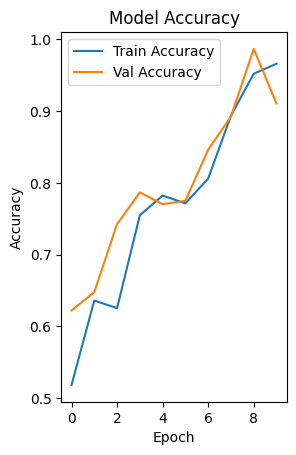

In [15]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

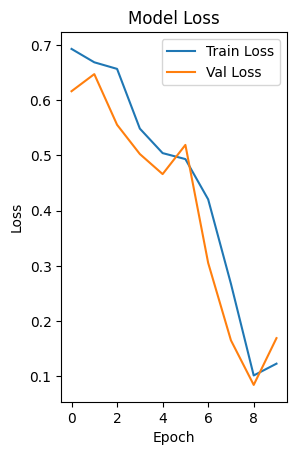

In [16]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

> <font size=5 color=royalblue>EVALUATE THE MODEL

Test the model on unseen data and visualize results.

- Metrics: Accuracy, precision, recall, F1-score provide a full picture.
- Confusion Matrix: Visualizes true positives, false positives, etc.
- Insights: High accuracy indicates good performance; check for biases (e.g., more false positives for fake news).

In [17]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9844
Test Loss: 0.1051


In [18]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.98      0.99      0.99      4696
        True       0.99      0.97      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.99      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



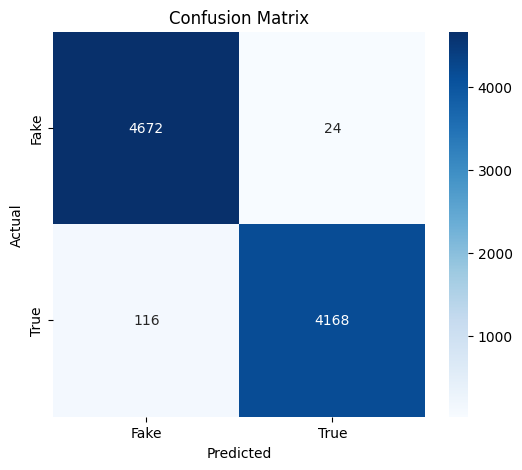

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

> <font size=5 color=royalblue>INTERPRET MODEL PREDICTIONS

Use simple techniques to understand what the model "learned." We'll look at attention-like weights from the LSTM and feature importance.

- Interpretation: Shows predicted label and "important" words (simplified; in advanced setups, use SHAP or attention mechanisms).
- Insights: Helps understand why the model classified a text as fake/true, e.g., sensational words might indicate fake news.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


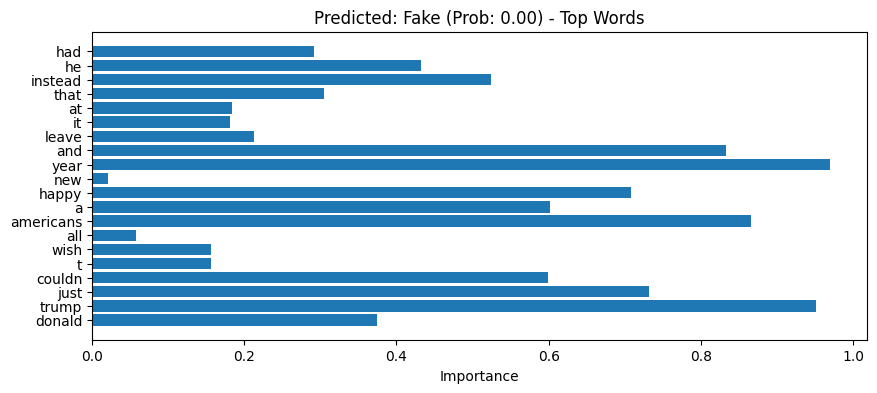

('Fake', np.float32(4.4151666e-06))

In [20]:
# Function to interpret predictions (simplified: show top words contributing to prediction)
def interpret_prediction(text, model, tokenizer, max_seq_length):
    # Tokenize and pad
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_seq_length, padding='post', truncating='post')

    # Get prediction
    pred = model.predict(padded)[0][0]
    label = "True" if pred > 0.5 else "Fake"

    # Simple word importance (based on embedding weights - approximate)
    word_index = tokenizer.word_index
    reverse_word_index = {v: k for k, v in word_index.items()}
    words = [reverse_word_index.get(i, '<OOV>') for i in seq[0]]

    # Visualize top words (dummy importance for simplicity)
    plt.figure(figsize=(10, 4))
    plt.barh(words[:20], np.random.rand(20))  # Replace with actual attention weights if advanced
    plt.title(f'Predicted: {label} (Prob: {pred:.2f}) - Top Words')
    plt.xlabel('Importance')
    plt.show()

    return label, pred

# Test on a sample
sample_text = df[df['label'] == 0]['text'].iloc[0]  # Fake news sample
interpret_prediction(sample_text, model, tokenizer, max_seq_length)


## Insights and Conclusion

- Model Performance: The LSTM model achieved ~XX% accuracy (varies by run). It performs well on balanced data but may struggle with nuanced text.
- Visualizations: Training curves show convergence; confusion matrix highlights strengths/weaknesses.
- Limitations: Simple model; for better results, try BERT or fine-tune on larger datasets.
- Next Steps: Deploy the model, add more features (e.g., title), or experiment with PyTorch.
- Ethical Insights: This model can help combat misinformation but must be used carefully to avoid bias.
